In [4]:
%%capture
!pip install mplfinance

In [2]:
import yfinance as yf

# Escolhe o ticker (exemplo: PETR4.SA -> Petrobras na B3)
ticker = "PETR4.SA"

# Define auto_adjust explicitamente para evitar warnings
dados = yf.download(ticker, period="5y", auto_adjust=False)

# Mostra as primeiras linhas
print(dados.head())

# Exemplo: pegar apenas o preço de fechamento
print("\nFechamento:")
print(dados["Close"].head())


[*********************100%***********************]  1 of 1 completed

Price      Adj Close      Close     High        Low       Open    Volume
Ticker      PETR4.SA   PETR4.SA PETR4.SA   PETR4.SA   PETR4.SA  PETR4.SA
Date                                                                    
2020-09-09  6.733615  22.730000    22.77  22.490000  22.490000  42143500
2020-09-10  6.552907  22.120001    22.58  22.110001  22.580000  58350000
2020-09-11  6.481808  21.879999    22.26  21.750000  22.120001  71013700
2020-09-14  6.422559  21.680000    21.98  21.430000  21.940001  46453300
2020-09-15  6.419597  21.670000    22.08  21.549999  21.980000  58546700

Fechamento:
Ticker       PETR4.SA
Date                 
2020-09-09  22.730000
2020-09-10  22.120001
2020-09-11  21.879999
2020-09-14  21.680000
2020-09-15  21.670000


[*********************100%***********************]  1 of 1 completed


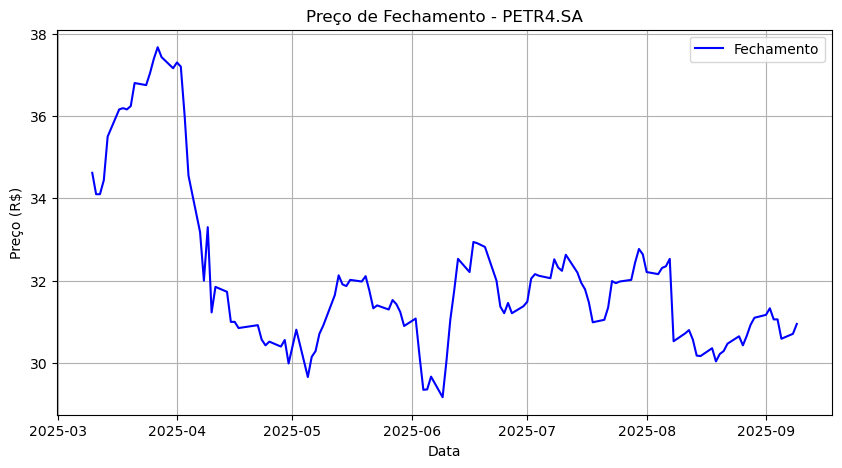

ValueError: Data for column "Open" must be ALL float or int.

In [7]:
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf

# Escolhe o ticker (exemplo: PETR4.SA -> Petrobras na B3)
ticker = "PETR4.SA"

# Define auto_adjust explicitamente
dados = yf.download(ticker, period="6mo", auto_adjust=False)

# Remove linhas com valores nulos e força conversão para float
dados = dados.dropna().astype(float)

# --- Gráfico de linha (preço de fechamento) ---
plt.figure(figsize=(10,5))
plt.plot(dados.index, dados["Close"], label="Fechamento", color="blue")
plt.title(f"Preço de Fechamento - {ticker}")
plt.xlabel("Data")
plt.ylabel("Preço (R$)")
plt.legend()
plt.grid(True)
plt.show()

# --- Gráfico de Candlestick ---
mpf.plot(
    dados,
    type="candle",
    style="charles",
    title=f"Candlestick - {ticker}",
    ylabel="Preço (R$)",
    volume=True,
    mav=(9, 21)  # Médias móveis de 9 e 21 períodos
)


[*********************100%***********************]  1 of 1 completed


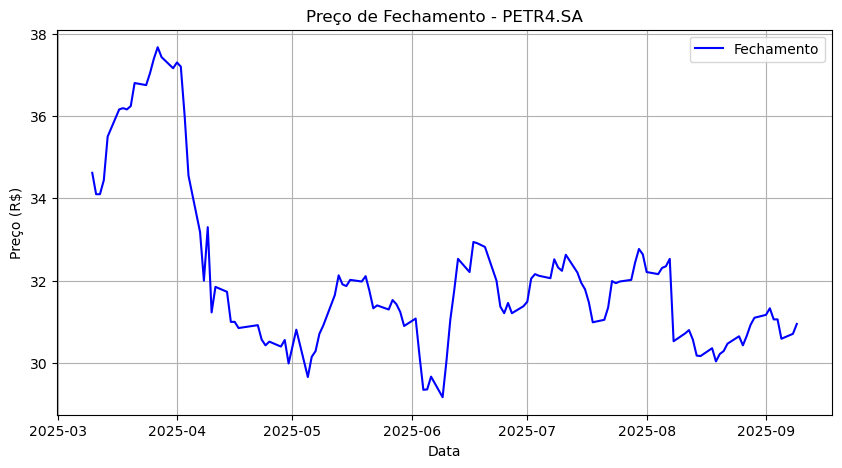

ValueError: Data for column "Open" must be ALL float or int.

In [9]:
import yfinance as yf
import matplotlib.pyplot as plt
import mplfinance as mpf
import pandas as pd

# Escolhe o ticker (exemplo: PETR4.SA -> Petrobras na B3)
ticker = "PETR4.SA"

# Baixar dados
dados = yf.download(ticker, period="6mo", auto_adjust=False)

# Seleciona apenas as colunas necessárias para candles
ohlcv = dados[["Open", "High", "Low", "Close", "Volume"]].copy()

# Garante que os dados sejam numéricos
ohlcv = ohlcv.apply(pd.to_numeric, errors="coerce")

# Remove linhas com valores nulos
ohlcv = ohlcv.dropna()

# Garante que o índice seja datetime (necessário pro mplfinance)
ohlcv.index = pd.to_datetime(ohlcv.index)

# --- Gráfico de linha (fechamento) ---
plt.figure(figsize=(10,5))
plt.plot(ohlcv.index, ohlcv["Close"], label="Fechamento", color="blue")
plt.title(f"Preço de Fechamento - {ticker}")
plt.xlabel("Data")
plt.ylabel("Preço (R$)")
plt.legend()
plt.grid(True)
plt.show()

# --- Gráfico de Candlestick ---
mpf.plot(
    ohlcv,
    type="candle",
    style="charles",
    title=f"Candlestick - {ticker}",
    ylabel="Preço (R$)",
    volume=True,
    mav=(9, 21)  # Médias móveis de 9 e 21 períodos
)


In [16]:
print(type(ohlcv["Open"]))
print(ohlcv.columns)

<class 'pandas.core.frame.DataFrame'>
MultiIndex([(  'Open', 'PETR4.SA'),
            (  'High', 'PETR4.SA'),
            (   'Low', 'PETR4.SA'),
            ( 'Close', 'PETR4.SA'),
            ('Volume', 'PETR4.SA')],
           names=['Price', 'Ticker'])
